# Project: Wrangling and Analyze Data

In [476]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [477]:
#create dataframe from csv file and display first 5 lines
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [478]:
#Define directory to save file to
folder_path = '/Users/sgabriel/Documents/Udacity/Data_Analyst/Projects/Data_Wrangling'

In [479]:
#Download file from URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resp = requests.get(url)

In [480]:
#save file to directory
with open(os.path.join(folder_path, url.split('/')[-1]), mode = 'wb') as file:
    file.write(resp.content)
#list all elements in current directory
os.listdir()

['twitter-api.py',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'tweet-json.txt',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'wrangle_report.ipynb',
 'act_report.ipynb',
 'tweet_json.txt']

In [481]:
#create dataframe from tsv file and display first 5 lines
df_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
df_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [482]:
#get file from URL
url2 = 'https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py'
resp2 = requests.get(url2)

In [483]:
#save file to directory
with open(os.path.join(folder_path, url2.split('/')[-1]), mode = 'wb') as file:
    file.write(resp2.content)
#list all elements in current directory
os.listdir()

['twitter-api.py',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'tweet-json.txt',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'wrangle_report.ipynb',
 'act_report.ipynb',
 'tweet_json.txt']

In [486]:
#get file from URL
url3 = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
resp3 = requests.get(url3)

In [487]:
#save file to directory
with open(os.path.join(folder_path, url3.split('/')[-1]), mode = 'wb') as file:
    file.write(resp3.content)
#list all elements in current directory
os.listdir()

['twitter-api.py',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'tweet-json.txt',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'wrangle_report.ipynb',
 'act_report.ipynb',
 'tweet_json.txt']

In [488]:
#list all tweets
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))
tweets

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [489]:
tweet_list = []

#with open('tweet-json.txt', encoding='utf-8') as json_file:  
#    data_json = json.load(json_file)
for each_tweet in tweets:
        tweet_id = each_tweet['id']
        whole_tweet = each_tweet['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_tweet['favorite_count']
        retweet_count = each_tweet['retweet_count']
        created_at = each_tweet['created_at']
        whole_source = each_tweet['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_tweet['retweeted_status'] = each_tweet.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        tweet_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])
tweet_list = pd.DataFrame(tweet_list)

In [490]:
tweet_list.head()

tweet_id  favorite_count  retweet_count                      url  \
0  892420643555336193           39467           8853  https://t.co/MgUWQ76dJU   
1  892177421306343426           33819           6514  https://t.co/0Xxu71qeIV   
2  891815181378084864           25461           4328  https://t.co/wUnZnhtVJB   
3  891689557279858688           42908           8964  https://t.co/tD36da7qLQ   
4  891327558926688256           41048           9774  https://t.co/AtUZn91f7f   

                       created_at              source retweeted_status  
0  Tue Aug 01 16:23:56 +0000 2017  Twitter for iPhone   Original tweet  
1  Tue Aug 01 00:17:27 +0000 2017  Twitter for iPhone   Original tweet  
2  Mon Jul 31 00:18:03 +0000 2017  Twitter for iPhone   Original tweet  
3  Sun Jul 30 15:58:51 +0000 2017  Twitter for iPhone   Original tweet  
4  Sat Jul 29 16:00:24 +0000 2017  Twitter for iPhone   Original tweet

### END : GATHER DATA
>The 3 dataframes are:

>df_twitter_archive- contains data read from provided csv

>df_predictions - contains data read (by using requests) from tsv file hosted on server

>tweet_list - contains data obtained from twitter

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### First Dataset

In [491]:
# Visual assessment of the DataFrame df_twitter_archive
df_twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [504]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- retweeted_status_timestamp, timestamp should be datetime instead of object (string).
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.



In [505]:
df_twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [506]:
df_twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1938  673906403526995968                    NaN                  NaN   
2169  669353438988365824           6.678065e+17         4.196984e+09   
624   795464331001561088                    NaN                  NaN   
1272  709225125749587968                    NaN                  NaN   
240   846514051647705089                    NaN                  NaN   

                      timestamp  \
1938  2015-12-07 16:46:21 +0000   
2169  2015-11-25 03:14:30 +0000   
624   2016-11-07 03:14:10 +0000   
1272  2016-03-14 03:50:21 +0000   
240   2017-03-28 00:07:32 +0000   

                                                 source  \
1938  <a href="http://twitter.com/download/iphone" r...   
2169  <a href="http://twitter.com/download/iphone" r...   
624   <a href="http://twitter.com/download/iphone" r...   
1272  <a href="http://twitter.com/download/iphone" r...   
240   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1938  Guys I'm getting real tired of this. We only r...                  NaN   
2169  This is Tessa. She is also very pleased after ...                  NaN   
624   Elder doggo does a splash. Both 13/10 incredib...                  NaN   
1272  This is Walker. He's a Butternut Khalifa. Appe...                  NaN   
240   This is Barney. He's an elder doggo. Hitches a...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1938                       NaN                        NaN   
2169                       NaN                        NaN   
624                        NaN                        NaN   
1272                       NaN                        NaN   
240                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1938  https://twitter.com/dog_rates/status/673906403...                 3   
2169  https://twitter.com/dog_rates/status/669353438...                10   
624   https://twitter.com/dog_rates/status/795464331...                13   
1272  https://twitter.com/dog_rates/status/709225125...                11   
240   https://twitter.com/dog_rates/status/846514051...                13   

      rating_denominator    name  doggo floofer pupper puppo  
1938                  10    None   None    None   None  None  
2169                  10   Tessa   None    None   None  None  
624                   10    None  doggo    None   None  None  
1272                  10  Walker   None    None   None  None  
240                   10  Barney  doggo    None   None  None

- some columns null objects are non-null (None to NaN).

In [507]:
df_twitter_archive['name'].sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

- Incorrect names or missing names in name column

In [508]:
df_twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Kingsley      1
Banditt       1
Batdog        1
Georgie       1
Spanky        1
Name: name, Length: 957, dtype: int64

- Incorrect names or missing names in name column such as a

In [509]:
df_twitter_archive.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

### Second Dataset

In [510]:
# Visual assessment of the Dataframe df_predictions
df_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [511]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [512]:
df_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [513]:
df_predictions.sample(5)

tweet_id                                          jpg_url  \
433   674318007229923329  https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg   
1607  800513324630806528  https://pbs.twimg.com/media/Cxv-nkJUoAAhzMt.jpg   
2001  876484053909872640  https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg   
1631  805520635690676224  https://pbs.twimg.com/media/Cy3IvdZXgAUoEaj.jpg   
824   693231807727280129  https://pbs.twimg.com/media/CZ7aplIUsAAq-8s.jpg   

      img_num                p1   p1_conf  p1_dog                        p2  \
433         1         porcupine  0.846628   False                   hamster   
1607        1          Pembroke  0.828904    True                  Cardigan   
2001        1  golden_retriever  0.874566    True             Irish_terrier   
1631        1          malinois  0.643147    True           German_shepherd   
824         1            vizsla  0.876413    True  Chesapeake_Bay_retriever   

       p2_conf  p2_dog                   p3   p3_conf  p3_dog  
433   0.038136   False              echidna  0.014680   False  
1607  0.167373    True            Chihuahua  0.000766    True  
2001  0.037354    True                 chow  0.016724    True  
1631  0.186642    True       Border_terrier  0.109345    True  
824   0.078400    True  Rhodesian_ridgeback  0.032194    True

In [514]:
df_predictions['jpg_url'].duplicated().sum()

66

- duplicate jpg_url entries

In [515]:
df_predictions[((df_predictions['p1_dog'] == False) & 
                  (df_predictions['p2_dog'] == False) & 
                  (df_predictions['p3_dog'] == False))]

tweet_id                                            jpg_url  \
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
...                  ...                                                ...   
2021  880935762899988482    https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg   
2022  881268444196462592    https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                p1   p1_conf  p1_dog               p2   p2_conf  \
6           1        box_turtle  0.933012   False       mud_turtle  0.045885   
17          1               hen  0.965932   False             cock  0.033919   
18          1  desktop_computer  0.086502   False             desk  0.085547   
21          1  three-toed_sloth  0.914671   False            otter  0.015250   
25          1        guinea_pig  0.996496   False            skunk  0.002402   
...       ...               ...       ...     ...              ...       ...   
2021        1       street_sign  0.251801   False         umbrella  0.115123   
2022        1            tusker  0.473303   False  Indian_elephant  0.245646   
2046        1       convertible  0.738995   False       sports_car  0.139952   
2052        1         limousine  0.130432   False        tow_truck  0.029175   
2074        1            orange  0.097049   False            bagel  0.085851   

      p2_dog              p3   p3_conf  p3_dog  
6      False        terrapin  0.017885   False  
17     False       partridge  0.000052   False  
18     False        bookcase  0.079480   False  
21     False  great_grey_owl  0.013207   False  
25     False         hamster  0.000461   False  
...      ...             ...       ...     ...  
2021   False   traffic_light  0.069534   False  
2022   False            ibex  0.055661   False  
2046   False       car_wheel  0.044173   False  
2052   False   shopping_cart  0.026321   False  
2074   False          banana  0.076110   False  

[324 rows x 12 columns]

- no dog was identified, no match

### Third Dataset

In [516]:
# Visual assessment of the Dataframe tweet_list
tweet_list

tweet_id  favorite_count  retweet_count  \
0     892420643555336193           39467           8853   
1     892177421306343426           33819           6514   
2     891815181378084864           25461           4328   
3     891689557279858688           42908           8964   
4     891327558926688256           41048           9774   
...                  ...             ...            ...   
2349  666049248165822465             111             41   
2350  666044226329800704             311            147   
2351  666033412701032449             128             47   
2352  666029285002620928             132             48   
2353  666020888022790149            2535            532   

                          url                      created_at  \
0     https://t.co/MgUWQ76dJU  Tue Aug 01 16:23:56 +0000 2017   
1     https://t.co/0Xxu71qeIV  Tue Aug 01 00:17:27 +0000 2017   
2     https://t.co/wUnZnhtVJB  Mon Jul 31 00:18:03 +0000 2017   
3     https://t.co/tD36da7qLQ  Sun Jul 30 15:58:51 +0000 2017   
4     https://t.co/AtUZn91f7f  Sat Jul 29 16:00:24 +0000 2017   
...                       ...                             ...   
2349  https://t.co/4B7cOc1EDq  Mon Nov 16 00:24:50 +0000 2015   
2350  https://t.co/DWnyCjf2mx  Mon Nov 16 00:04:52 +0000 2015   
2351  https://t.co/y671yMhoiR  Sun Nov 15 23:21:54 +0000 2015   
2352  https://t.co/r7mOb2m0UI  Sun Nov 15 23:05:30 +0000 2015   
2353  https://t.co/BLDqew2Ijj  Sun Nov 15 22:32:08 +0000 2015   

                  source retweeted_status  
0     Twitter for iPhone   Original tweet  
1     Twitter for iPhone   Original tweet  
2     Twitter for iPhone   Original tweet  
3     Twitter for iPhone   Original tweet  
4     Twitter for iPhone   Original tweet  
...                  ...              ...  
2349  Twitter for iPhone   Original tweet  
2350  Twitter for iPhone   Original tweet  
2351  Twitter for iPhone   Original tweet  
2352  Twitter for iPhone   Original tweet  
2353  Twitter for iPhone   Original tweet  

[2354 rows x 7 columns]

In [517]:
tweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   object
 1   favorite_count    2354 non-null   int64 
 2   retweet_count     2354 non-null   int64 
 3   url               2354 non-null   object
 4   created_at        2354 non-null   object
 5   source            2354 non-null   object
 6   retweeted_status  2354 non-null   object
dtypes: int64(2), object(5)
memory usage: 128.9+ KB


- created_at wrong DataType should be date time

In [518]:
tweet_list.describe()

favorite_count  retweet_count
count     2354.000000    2354.000000
mean      8080.968564    3164.797366
std      11814.771334    5284.770364
min          0.000000       0.000000
25%       1415.000000     624.500000
50%       3603.500000    1473.500000
75%      10122.250000    3652.000000
max     132810.000000   79515.000000

In [519]:
tweet_list.sample(5)

tweet_id  favorite_count  retweet_count  \
1860  675432746517426176            1623            627   
86    875144289856114688           22185           5081   
1332  705428427625635840            4188           1931   
2008  672248013293752320            1833            656   
65    879415818425184262          107956          45849   

                          url                      created_at  \
1860  https://t.co/wNkqAED6lG  Fri Dec 11 21:51:30 +0000 2015   
86    https://t.co/ogith9ejNj  Thu Jun 15 00:13:52 +0000 2017   
1332  https://t.co/ih6epBOxIA  Thu Mar 03 16:23:38 +0000 2016   
2008  https://t.co/uhx5gfpx5k  Thu Dec 03 02:56:30 +0000 2015   
65    https://t.co/UDT7ZkcTgY  Mon Jun 26 19:07:24 +0000 2017   

                  source retweeted_status  
1860  Twitter for iPhone   Original tweet  
86    Twitter for iPhone   Original tweet  
1332  Twitter for iPhone   Original tweet  
2008  Twitter for iPhone   Original tweet  
65    Twitter for iPhone   Original tweet

In [520]:
# Check how many tweets are retweets
tweet_list.retweeted_status.value_counts()


Original tweet       2175
This is a retweet     179
Name: retweeted_status, dtype: int64

- 179 retweets

### Quality issues
#### df_twitter_archive dataframe

1. Incorrect names or missing names in name column such as, a, an, the... - all are written with lower case letters
2. retweeted_status_timestamp, timestamp should be datetime instead of object (string).
3. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.
4. In several columns null objects are non-null (None to NaN).

#### df_predictions dataframe

1. Remove duplicate jpg_url entries
2. Remove entries that have p1_dog, p2_dog, & p3_dog values set to false. These are not dogs of any kind.

#### tweet_list dataframe

1. Remove retweets
2. crewated_at should be of datatime datatype instead of string

### Tidiness issues
1. Combine the 4 dog category columns into a single column in the df_twitter_archive table
2. Join df_twitter_archive, df_predictions and tweet_list tables


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [521]:
# Make copies of original pieces of data
archive_clean = df_twitter_archive.copy()
predictions_clean = df_predictions.copy()
tweet_list_clean = tweet_list.copy()

### Issue #1: Archive: Incorrect names or missing names in name column

#### Define: Remove all invalide dog names

#### Code

In [522]:
# Drop any rows that contain NaN in the name column
archive_clean.dropna(subset=['name'], inplace=True)

In [523]:
# Drop any rows that contain None in the name column
archive_clean = archive_clean[archive_clean.name != 'None']

In [524]:
# Use a regular expression to find name entries that are uppercase
archive_clean['name'] = archive_clean.name.str.extract('\\b([A-Z]\\S*)\\b')

#### Test

In [525]:
archive_clean['name'].value_counts()

Charlie           12
Lucy              11
Cooper            11
Oliver            11
Tucker            10
                  ..
Ralpher            1
Michelangelope     1
Orion              1
Dudley             1
Spanky             1
Name: name, Length: 931, dtype: int64

### Issue #2: Archive: retweeted_status_timestamp, timestamp should be datetime instead of object (string).

#### Define
Correct DataType of the columns to Datetime

#### Code

In [526]:
#correct data types
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)
archive_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_clean.retweeted_status_timestamp)

#### Test

In [527]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 2354
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1611 non-null   int64              
 1   in_reply_to_status_id       1 non-null      float64            
 2   in_reply_to_user_id         1 non-null      float64            
 3   timestamp                   1611 non-null   datetime64[ns, UTC]
 4   source                      1611 non-null   object             
 5   text                        1611 non-null   object             
 6   retweeted_status_id         116 non-null    float64            
 7   retweeted_status_user_id    116 non-null    float64            
 8   retweeted_status_timestamp  116 non-null    datetime64[ns, UTC]
 9   expanded_urls               1611 non-null   object             
 10  rating_numerator            1611 non-null   int64           

### Issue #3: Archive: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.

#### Define

Correct DataType of the columns to strings

#### Code

In [528]:
archive_clean['in_reply_to_status_id'] = archive_clean.in_reply_to_status_id.astype(str)
archive_clean['in_reply_to_user_id'] = archive_clean.in_reply_to_user_id.astype(str)
archive_clean['retweeted_status_id'] = archive_clean.retweeted_status_id.astype(str)
archive_clean['retweeted_status_user_id'] = archive_clean.retweeted_status_user_id.astype(str)




#### Test

In [529]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 2354
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1611 non-null   int64              
 1   in_reply_to_status_id       1611 non-null   object             
 2   in_reply_to_user_id         1611 non-null   object             
 3   timestamp                   1611 non-null   datetime64[ns, UTC]
 4   source                      1611 non-null   object             
 5   text                        1611 non-null   object             
 6   retweeted_status_id         1611 non-null   object             
 7   retweeted_status_user_id    1611 non-null   object             
 8   retweeted_status_timestamp  116 non-null    datetime64[ns, UTC]
 9   expanded_urls               1611 non-null   object             
 10  rating_numerator            1611 non-null   int64           

### Issue #4: Archive: 4. In several columns null objects are non-null (None to NaN).


#### Define
Drop NaN values in Name column

#### Code

In [530]:
archive_clean.isna().sum()

tweet_id                         0
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                        0
source                           0
text                             0
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp    1495
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                           109
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [531]:
archive_clean.dropna(subset=['name'],inplace = True)

#### Test

In [532]:
archive_clean.isna().sum()

tweet_id                         0
in_reply_to_status_id            0
in_reply_to_user_id              0
timestamp                        0
source                           0
text                             0
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp    1391
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Issue #5: df_predictions:  duplicate jpg_url entries



#### Define
Remove duplicate jpg_url entries

#### Code


In [533]:
# Drop all rows with duplicate addresses for jpg_url
predictions_clean = predictions_clean.drop_duplicates(subset='jpg_url')

#### Test


In [534]:
# Verify that there are no longer duplicate entries for jpg_url
len(predictions_clean[predictions_clean.jpg_url.duplicated()])

0

### Issue #6: df_predictions:  Entries with p1_dog, p2_dog, & p3_dog values set to false. No Dogs


#### Define
remove rows with p1_dog, p2_dog, & p3_dog values set to false.

#### Code

In [535]:
# Only keep rows with entries that have p1_dog, p2_dog, & p3_dog values set to True
predictions_clean = predictions_clean[((predictions_clean['p1_dog'] == True) & 
                  (predictions_clean['p2_dog'] == True) & 
                  (predictions_clean['p3_dog'] == True))]

#### Test

In [536]:
len(predictions_clean[((predictions_clean['p1_dog'] == False) & 
                  (predictions_clean['p2_dog'] == False) & 
                  (predictions_clean['p3_dog'] == False))])

0

### Issue #7: tweet_list_clean:  Many Retweets

#### Define
remove retweets

#### Code


In [537]:
tweet_list_clean = tweet_list_clean[tweet_list_clean['retweeted_status'] == 'Original tweet']

#### Test


In [538]:
tweet_list_clean['retweeted_status'].value_counts()

Original tweet    2175
Name: retweeted_status, dtype: int64

### Issue #8: tweet_list_clean:  created_at should be of datatime datatype

#### Define
Change datatype

#### Code


In [539]:
tweet_list_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2175 non-null   object
 1   favorite_count    2175 non-null   int64 
 2   retweet_count     2175 non-null   int64 
 3   url               2175 non-null   object
 4   created_at        2175 non-null   object
 5   source            2175 non-null   object
 6   retweeted_status  2175 non-null   object
dtypes: int64(2), object(5)
memory usage: 135.9+ KB


In [540]:
tweet_list_clean['created_at'] = pd.to_datetime(tweet_list_clean.created_at)


#### Test


In [541]:
tweet_list_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2175 non-null   object             
 1   favorite_count    2175 non-null   int64              
 2   retweet_count     2175 non-null   int64              
 3   url               2175 non-null   object             
 4   created_at        2175 non-null   datetime64[ns, UTC]
 5   source            2175 non-null   object             
 6   retweeted_status  2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 135.9+ KB


### Issue #9: Tidiness: 4 dog category columns in the archive_clean table


#### Define
Combine 4 dog category columns in the archive_clean table

#### Code


In [542]:
# Extract the dog stage names from the the 4 individual columns and combine into one 'stage' column

categories = ['doggo', 'floofer', 'pupper', 'puppo']
for category in categories:
    archive_clean[category] = archive_clean[category].apply(lambda x: np.NaN if x == 'None' else x)
    
archive_clean['category'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
archive_clean['category'] = archive_clean['category'].apply(lambda x: x.replace('nan', ''))
archive_clean['category'] = archive_clean['category'].apply(lambda x: np.NaN if x == '' else x)

archive_clean['category'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

In [543]:

# Drop individual dog category columns
cols_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean.drop(cols_to_drop, axis=1, inplace=True)

#### Test


In [544]:
# Verify that the 4 dog category columns have merged into a single dog_category column
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1502 non-null   int64              
 1   in_reply_to_status_id       1502 non-null   object             
 2   in_reply_to_user_id         1502 non-null   object             
 3   timestamp                   1502 non-null   datetime64[ns, UTC]
 4   source                      1502 non-null   object             
 5   text                        1502 non-null   object             
 6   retweeted_status_id         1502 non-null   object             
 7   retweeted_status_user_id    1502 non-null   object             
 8   retweeted_status_timestamp  111 non-null    datetime64[ns, UTC]
 9   expanded_urls               1502 non-null   object             
 10  rating_numerator            1502 non-null   int64           

In [545]:
# View the value counts for the new stage column
archive_clean['category'].value_counts()

pupper          130
doggo            45
puppo            20
floofer           5
doggo pupper      4
Name: category, dtype: int64

### Issue #10: Tidiness: 3 separate tables

#### Define
join  archive_clean, predictions_clean and tweet_list_clean tables

#### Code


In [548]:
# Merge the archive and prediction tables into a single data frame
combined_archive = pd.merge(archive_clean, predictions_clean, on='tweet_id')

#### Test


In [549]:
# Verify the structure of the new combined dataframe
combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    852 non-null    int64              
 1   in_reply_to_status_id       852 non-null    object             
 2   in_reply_to_user_id         852 non-null    object             
 3   timestamp                   852 non-null    datetime64[ns, UTC]
 4   source                      852 non-null    object             
 5   text                        852 non-null    object             
 6   retweeted_status_id         852 non-null    object             
 7   retweeted_status_user_id    852 non-null    object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               852 non-null    object             
 10  rating_numerator            852 non-null    int64             

In [550]:
#Change Datatype
tweet_list_clean['tweet_id'] = tweet_list_clean['tweet_id'].astype(int)

In [551]:
tweet_list_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2175 non-null   int64              
 1   favorite_count    2175 non-null   int64              
 2   retweet_count     2175 non-null   int64              
 3   url               2175 non-null   object             
 4   created_at        2175 non-null   datetime64[ns, UTC]
 5   source            2175 non-null   object             
 6   retweeted_status  2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 135.9+ KB


In [552]:
# Merge the tweet_json table into the combined_archive data frame
combined_archive = pd.merge(combined_archive, tweet_list_clean, on='tweet_id')

In [553]:
combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    852 non-null    int64              
 1   in_reply_to_status_id       852 non-null    object             
 2   in_reply_to_user_id         852 non-null    object             
 3   timestamp                   852 non-null    datetime64[ns, UTC]
 4   source_x                    852 non-null    object             
 5   text                        852 non-null    object             
 6   retweeted_status_id         852 non-null    object             
 7   retweeted_status_user_id    852 non-null    object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               852 non-null    object             
 10  rating_numerator            852 non-null    int64             

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [554]:
# Store the combined_archive DataFrame in a CSV file
combined_archive.to_csv('twitter_archive_master.csv', 
                         index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [555]:
import matplotlib.pyplot as plt

### Insights:
1. Cooper is most used Dog name

2. Clumber is the dog breed with the highest numerator

3. Pupper is the most found dog category

In [556]:
# Find the total occurrences of each dog name in the cleaned combined_archive dataframe
combined_archive.name.value_counts()

Cooper     9
Charlie    8
Oliver     7
Koda       6
Sadie      6
          ..
Toffee     1
Adele      1
Kayla      1
Fillup     1
Stephan    1
Name: name, Length: 632, dtype: int64

### Visualization

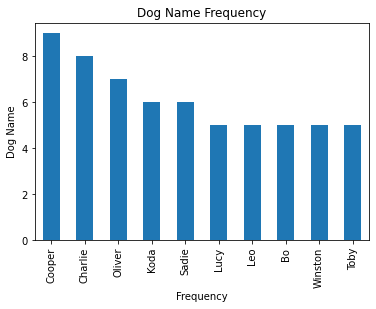

In [557]:
visual = combined_archive.name.value_counts().nlargest(10).plot(kind='bar');
visual.set_title('Dog Name Frequency');
visual.set_xlabel('Frequency');
visual.set_ylabel('Dog Name');

In [558]:

combined_archive.rating_numerator.describe()

count    852.000000
mean      11.070423
std        2.218334
min        2.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       50.000000
Name: rating_numerator, dtype: float64

In [559]:
# Find the dog breed with the highest numerator
combined_archive.groupby('p1')['rating_numerator'].mean().nlargest(10)

p1
clumber                27.000000
Siberian_husky         13.750000
Bedlington_terrier     13.500000
Irish_setter           13.000000
Border_terrier         12.333333
Saluki                 12.333333
Irish_water_spaniel    12.000000
Tibetan_mastiff        12.000000
briard                 12.000000
silky_terrier          12.000000
Name: rating_numerator, dtype: float64

In [560]:
combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    852 non-null    int64              
 1   in_reply_to_status_id       852 non-null    object             
 2   in_reply_to_user_id         852 non-null    object             
 3   timestamp                   852 non-null    datetime64[ns, UTC]
 4   source_x                    852 non-null    object             
 5   text                        852 non-null    object             
 6   retweeted_status_id         852 non-null    object             
 7   retweeted_status_user_id    852 non-null    object             
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               852 non-null    object             
 10  rating_numerator            852 non-null    int64             

In [561]:
combined_archive.head()

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0  892177421306343426                   nan                 nan   
1  891815181378084864                   nan                 nan   
2  891327558926688256                   nan                 nan   
3  890609185150312448                   nan                 nan   
4  890240255349198849                   nan                 nan   

                  timestamp  \
0 2017-08-01 00:17:27+00:00   
1 2017-07-31 00:18:03+00:00   
2 2017-07-29 16:00:24+00:00   
3 2017-07-27 16:25:51+00:00   
4 2017-07-26 15:59:51+00:00   

                                            source_x  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text retweeted_status_id  \
0  This is Tilly. She's just checking pup on you....                 nan   
1  This is Archie. He is a rare Norwegian Pouncin...                 nan   
2  This is Franklin. He would like you to stop ca...                 nan   
3  This is Zoey. She doesn't want to be one of th...                 nan   
4  This is Cassie. She is a college pup. Studying...                 nan   

  retweeted_status_user_id retweeted_status_timestamp  \
0                      nan                        NaT   
1                      nan                        NaT   
2                      nan                        NaT   
3                      nan                        NaT   
4                      nan                        NaT   

                                       expanded_urls  ...  p2_dog  \
0  https://twitter.com/dog_rates/status/892177421...  ...    True   
1  https://twitter.com/dog_rates/status/891815181...  ...    True   
2  https://twitter.com/dog_rates/status/891327558...  ...    True   
3  https://twitter.com/dog_rates/status/890609185...  ...    True   
4  https://twitter.com/dog_rates/status/890240255...  ...    True   

                            p3   p3_conf p3_dog favorite_count  retweet_count  \
0                     papillon  0.068957   True          33819           6514   
1                       kelpie  0.031379   True          25461           4328   
2  German_short-haired_pointer  0.175219   True          41048           9774   
3     Chesapeake_Bay_retriever  0.118184   True          28226           4429   
4                    Chihuahua  0.029248   True          32467           7711   

                       url                created_at            source_y  \
0  https://t.co/0Xxu71qeIV 2017-08-01 00:17:27+00:00  Twitter for iPhone   
1  https://t.co/wUnZnhtVJB 2017-07-31 00:18:03+00:00  Twitter for iPhone   
2  https://t.co/AtUZn91f7f 2017-07-29 16:00:24+00:00  Twitter for iPhone   
3  https://t.co/9TwLuAGH0b 2017-07-27 16:25:51+00:00  Twitter for iPhone   
4  https://t.co/t1bfwz5S2A 2017-07-26 15:59:51+00:00  Twitter for iPhone   

  retweeted_status  
0   Original tweet  
1   Original tweet  
2   Original tweet  
3   Original tweet  
4   Original tweet  

[5 rows x 31 columns]

In [562]:
len(combined_archive.query('category != "pupper" & category != "doggo" & category != "puppo" & category != "doggo pupper"'))

745

In [563]:
# Find the percentages of dog categories
sum_cat = combined_archive['category'].shape[0] - len(combined_archive.query('category != "pupper" & category != "doggo" & category != "puppo" & category != "doggo pupper"'))
print(sum_cat)
pupper_p = combined_archive.query('category == "pupper"').shape[0]/sum_cat
doggo_p = combined_archive.query('category == "doggo"').shape[0]/sum_cat
puppo_p = combined_archive.query('category == "puppo"').shape[0]/sum_cat
doggo_pupper_p = combined_archive.query('category == "doggo pupper"').shape[0]/sum_cat
print(pupper_p)
print(doggo_p)
print(puppo_p)
print(doggo_pupper_p)

107
0.6448598130841121
0.205607476635514
0.12149532710280374
0.028037383177570093


<ipython-input-564-4a50798554ad>:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels=names, labeldistance=1.15);


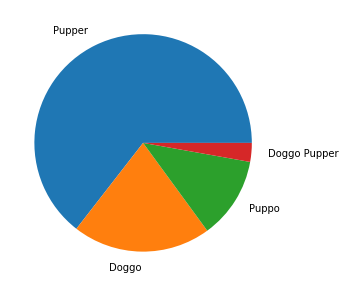

In [564]:
plt.rcParams["figure.figsize"] = (20,5)

values=[pupper_p,doggo_p,puppo_p,doggo_pupper_p]
names = ['Pupper','Doggo','Puppo','Doggo Pupper'] 

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15);
plt.show();
